In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
Label ={
    0 : 'airplane',
    1 : 'automobile',
    2 : 'bird',
    3 : 'cat',
    4 : 'deer',
    5 : 'dog',
    6 : 'frog',
    7 : 'horse',
    8 : 'ship',
    9 : 'truck'
}

In [4]:
print('Training data shape: ',x_train.shape)
print('Training label shape: ',y_train.shape)
print('Test data shape: ',x_test.shape)
print('Test label shape: ',y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training label shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test label shape:  (10000, 1)


In [12]:
Label.values()

dict_values(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

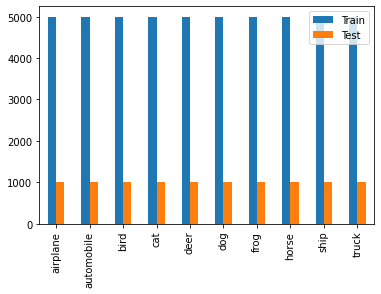

In [13]:
_,train_count = np.unique(y_train,return_counts = True)
_,test_count = np.unique(y_test,return_counts=True)
pd.DataFrame({'Train':train_count,'Test':test_count},index = Label.values()).plot.bar()
plt.show()

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

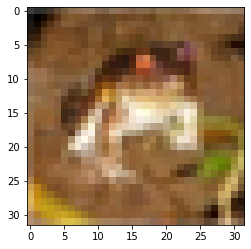

In [16]:
plt.imshow(x_train[0])

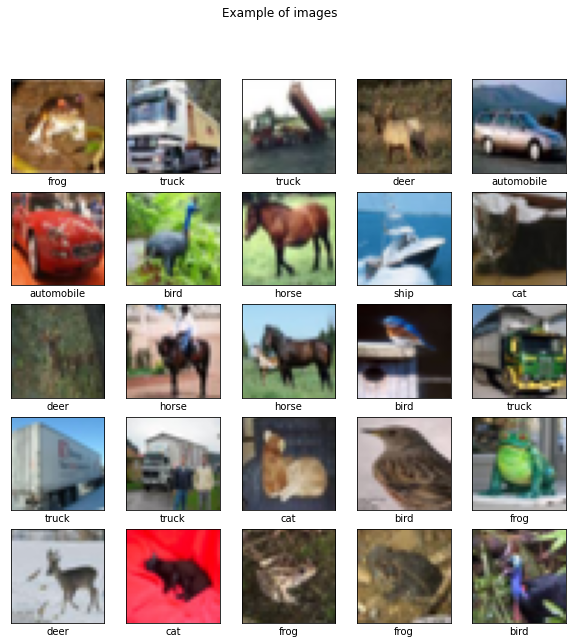

In [25]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("Example of images")
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(Label[int(y_train[i])]) 
  

In [26]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [27]:
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [28]:
model = tf.keras.Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',activation ='relu',input_shape = x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), activation = 'relu', padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation = 'relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [30]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics =['acc'])

In [33]:
x_val = x_train[40000:,:,:,:]
y_val = y_train[40000:,:]
x_train = x_train[:40000,:,:,:]
y_train = y_train[:40000,:]

In [34]:
x_train.shape,x_val.shape,x_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [35]:
history = model.fit(x_train,y_train,batch_size = 32,epochs = 10,validation_data=(x_val,y_val))

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2559 - acc: 0.5592 - val_loss: 1.1254 - val_acc: 0.6145
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0911 - acc: 0.6206 - val_loss: 0.8816 - val_acc: 0.6967
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9748 - acc: 0.6628 - val_loss: 0.8943 - val_acc: 0.6912
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9145 - acc: 0.6860 - val_loss: 0.7816 - val_acc: 0.7311
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8487 - acc: 0.7059 - val_loss: 0.8401 - val_acc: 0.7074
Epoch 6/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.7881 - acc: 0.7296 - val_loss: 0.8072 - val_acc: 0.7415
Epoch 7/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.7455 - acc: 0.7454 - val_loss: 0.6945 - val_acc: 0.7639
Epoch 8/10
1250/1250 [==============================] 

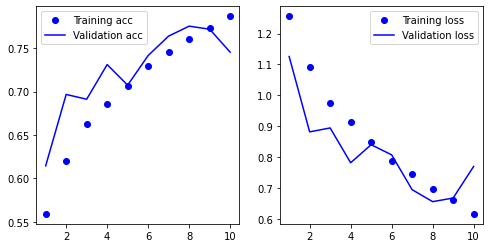

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (8,4))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(1,2,1)
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label ='Validation acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label ='Validation loss')
plt.legend()
plt.show()

In [40]:
test_loss = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7765 - acc: 0.7383


In [45]:
x_test[1:2].shape

(1, 32, 32, 3)

In [44]:
model.predict(x_test[1:2])

1/1 [==============================] - 0s 213ms/step


array([[4.4350290e-07, 3.6772896e-04, 9.9264173e-12, 3.4976560e-13,
        2.6392916e-14, 5.1027562e-16, 3.7865429e-14, 1.9122382e-16,
        9.9963152e-01, 2.1151612e-07]], dtype=float32)

1/1 [==============================] - 0s 32ms/step


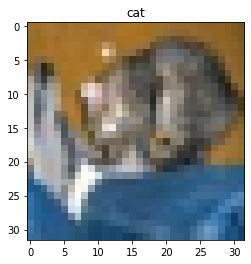

In [46]:
plt.imshow(x_test[0])

plt.title(Label[np.argmax(model.predict(x_test[0:1]))])
plt.show()

In [49]:
Label[np.argmax(y_test[0])]

'cat'

1/1 [==============================] - 0s 22ms/step


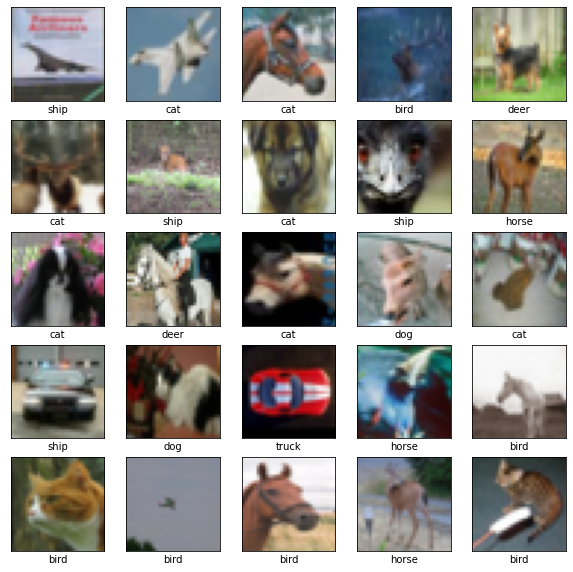

In [53]:
count_test_error = 0
fig = plt.figure(figsize = (10,10))
for i in range(len(x_test)):
  if (np.argmax(model.predict(x_test[i:i+1])) != np.argmax(y_test[i])):
    count_test_error +=1
    plt.subplot(5,5,count_test_error)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(Label[np.argmax(model.predict(x_test[i:i+1]))])
  if count_test_error > 24:
    break

In [61]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 1s 2ms/step


In [64]:
y_pred = y_pred.reshape(10000,1)

In [66]:
y_test = np.argmax(y_test, axis=1).reshape(10000,1)

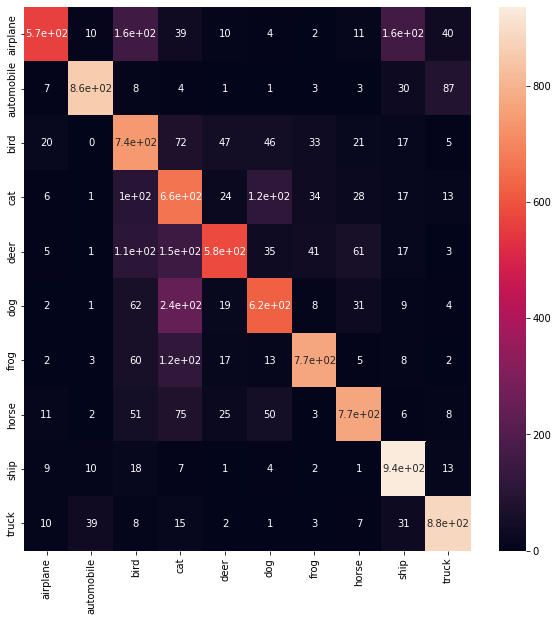

In [71]:
cm = confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
sns.heatmap(cm, annot = True ,
            annot_kws = {"size":10},
            xticklabels=Label.values(),
            yticklabels=Label.values(),ax = ax)

plt.show()

In [72]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [73]:
model1 = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [79]:
train_features = model1.predict(x_train)

1250/1250 [==============================] - 8s 6ms/step


In [81]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(1,1,512)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model2.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['acc'])
history2 = model2.fit(train_features,y_train,batch_size = 32,epochs = 10,validation_split = 0.2)

Epoch 1/10
1000/1000 [==============================] - 5s 4ms/step - loss: 1.4305 - acc: 0.5028 - val_loss: 1.3030 - val_acc: 0.5386
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.2222 - acc: 0.5752 - val_loss: 1.2284 - val_acc: 0.5705
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.1589 - acc: 0.5964 - val_loss: 1.2040 - val_acc: 0.5805
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1159 - acc: 0.6092 - val_loss: 1.1987 - val_acc: 0.5805
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0789 - acc: 0.6237 - val_loss: 1.1739 - val_acc: 0.5855
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0492 - acc: 0.6320 - val_loss: 1.1554 - val_acc: 0.5929
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0226 - acc: 0.6432 - val_loss: 1.1563 - val_acc: 0.5932
Epoch 8/10
1000/1000 [==============================] - 4s 4ms

1/1 [==============================] - 0s 80ms/step
cat


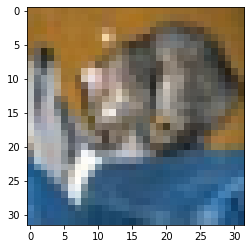

In [86]:
print(Label[np.argmax(model2.predict(model1.predict(x_test[0:1])))])
plt.imshow(x_test[0])